## Exercise 13: Interface

For this exercise, I wanted to make sure that everything was working properly (and was also stuck on my Mac while I was home for the holidays), so I utilized a similar example to what you used in the example - a Metacritic review page of Pokemon Shining Pearl, which I had been putting a little time into lately since its release in my down time.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}
for i in range(0,39):
    url = 'https://www.metacritic.com/game/switch/pokemon-shining-pearl/user-reviews?page=' + str(i)
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response = requests.get(url, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    for review in soup.find_all('div', class_='review_content'): 
        if review.find('div', class_='name') == None:
            break 
        review_dict['name'].append(review.find('div', class_='name').find('a').text)
        review_dict['date'].append(review.find('div', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
        if review.find('span', class_='blurb blurb_expanded'): 
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
        elif review.find('div',class_='review_body').find('span') == None:
            review_dict['review'].append('No review text.')
        else:
            review_dict['review'].append(review.find('div',class_='review_body').find('span').text)

In [3]:
pkmn_reviews = pd.DataFrame(review_dict)
print(pkmn_reviews)

               name          date rating  \
0      LynxReviewer  Nov 21, 2021     10   
1   DistantKingDumb  Nov 21, 2021     10   
2           Alvalos  Nov 21, 2021      8   
3         Donkristo  Nov 21, 2021      9   
4        Caith_Sith  Nov 21, 2021     10   
..              ...           ...    ...   
88           Daitya  Nov 28, 2021     10   
89        Latios___  Nov 25, 2021      0   
90   pokemonmaster9  Nov 25, 2021      0   
91       Brunosky99  Nov 24, 2021      8   
92      Duckfan2037  Nov 27, 2021      7   

                                               review  
0   Many times the Pokémon Company has been critic...  
1   Good game, I generally love all the animations...  
2   Are they perfect? NoAre they fun? YesDoes it i...  
3   Отличная игра. Графика, бои, анимация все раду...  
4   A nostalgic journey from start to finish, a ga...  
..                                                ...  
88  Un buen y pulido apartado gráfico, banda sonor...  
89  Bugs from able to c

In [4]:
import re
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags = re.UNICODE)

In [5]:
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_reviews(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [6]:
cleaned_reviews = []
for i in range(0,len(pkmn_reviews['review'])):
    cleaned_reviews.append(cleaning_reviews((pkmn_reviews.review[i])))
print(cleaned_reviews[0:5])

['many times the pokémon company has been criticized the past for very bad judgment but with the latest games including this one see that the saga very good hands', 'good game generally love all the animations and remade models and think lives the original game every aspect', 'are they perfect noare they fun yesdoes include platinum content noare the graphics bad nowould you replay them again heartbeatbdsp without shadow doubt trip down nostalgia lane imagining the original journeys throughout the sinnoh region from their initial outings diamond pearl story the goal was achieve faithful remakes those games then ilca have fully succeeded their mission just leisurely paced the original diamond pearl encouraging the player take their time and take their surroundings the story quite grand but wasn fully realised and developed until platinum lots explore whilst not feeling too linear with maze like map this instance however after playing through the game personally feel though the fleshed o

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["game","switch","nintendo"])

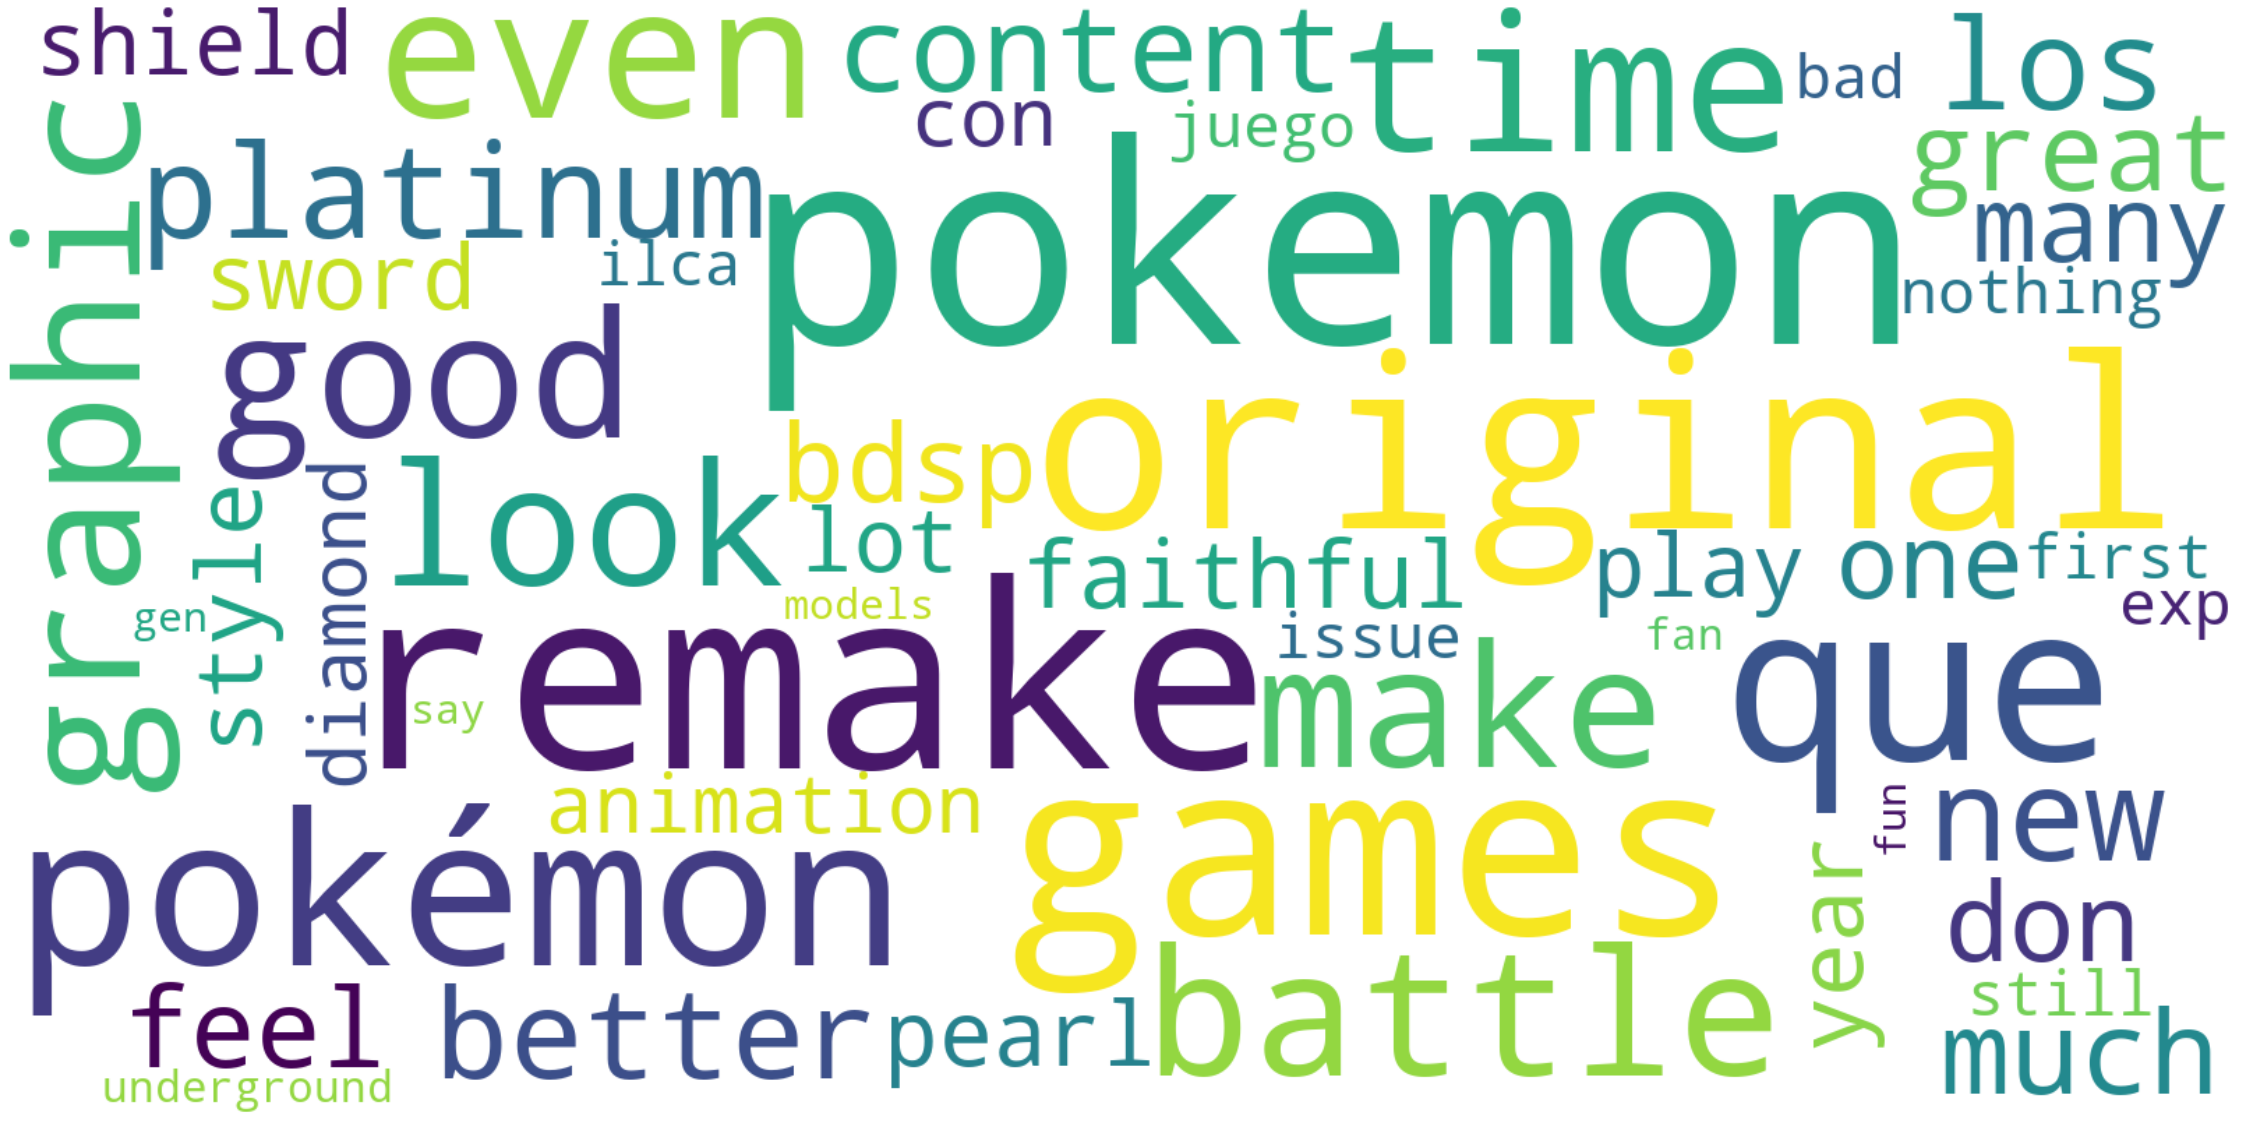

In [10]:
string = pd.Series(cleaned_reviews).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
import numpy as np
from PIL import Image
import random

mask = np.array(Image.open('./pokeball.png'))

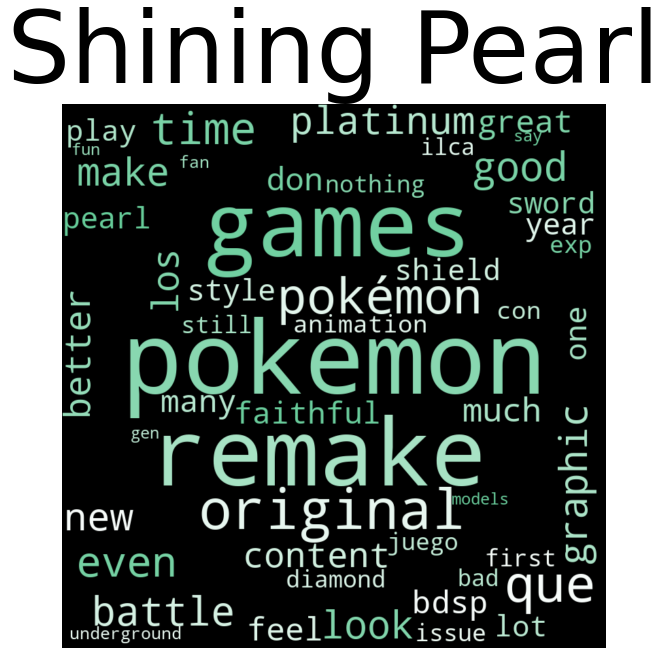

In [13]:
wordcloud = WordCloud(width=2000, mask = mask,stopwords=stopwords,height=1000,max_font_size=200,max_words=50,collocations=False,background_color='black').generate(string)
f = plt.figure(figsize=(20,10))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(150, 50%%, %d%%)" % random.randint(60, 100)
plt.axis("off")

plt.imshow(wordcloud.recolor(color_func=green_color_func, random_state=3),
           interpolation="bilinear")
plt.title('Shining Pearl', size='100')
plt.axis("off")
plt.show()

In [14]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

sid = SentimentIntensityAnalyzer()

In [15]:
def calculate_sentiment(text):
    scores = sid.polarity_scores(text)
    compound_score = scores['compound']
    return compound_score

In [16]:
pkmn_reviews['Sentiment Score'] = pkmn_reviews['review'].apply(calculate_sentiment)
pkmn_reviews.sort_values(by='Sentiment Score', ascending=False)[:15]

,name,date,rating,review,Sentiment Score
2,Alvalos,"Nov 21, 2021",8,Are they perfect? NoAre they fun? YesDoes it i...,0.9988
80,Kidwild,"Nov 22, 2021",4,"For a so called ""remake"". It feels like a RE-B...",0.9981
81,LCBane,"Nov 22, 2021",6,A safe recreation of the base games without ad...,0.9974
18,katieelizabeth,"Nov 20, 2021",5,"Pokemon BDSP are not bad games, but overall I'...",0.9944
36,Starfree,"Nov 22, 2021",8,This game is flawed but amazing. I would say i...,0.9918
38,FriendlyDM2,"Nov 22, 2021",9,I’ve enjoyed this game a lot!\r Seeing Pokémon...,0.9909
70,Detorded,"Nov 22, 2021",7,These are undoubtedly the best Pokemon games o...,0.9907
85,monarch250,"Nov 24, 2021",9,Nostalgia done right!\r This game is made to b...,0.9904
79,qweqaz123,"Nov 21, 2021",0,This is a remake from a game made over 10 year...,0.9865
11,Buurto,"Nov 21, 2021",10,Game is a perfect review. Music is great. Grap...,0.9810


In [18]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
from bokeh.palettes import Viridis256
from bokeh.models.tools import HoverTool
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.models import ColorBar
from bokeh.transform import linear_cmap
from bokeh.models.tools import WheelZoomTool
from bokeh.transform import jitter

output_file(filename="pkmn.html", title="Pearl Reviews Visualization")

In [19]:
pkmn_reviews['rating'] = pkmn_reviews['rating'].astype(int)
source = ColumnDataSource(pkmn_reviews)
mapper = linear_cmap(field_name='Sentiment Score', palette=Viridis256 ,low=-1 ,high=1)
p = figure(plot_height=1000, plot_width=1000, toolbar_location="below")
p.circle(x=jitter('rating',width=1,range=p.x_range), y='Sentiment Score', source=source, size=5, line_color=mapper,color=mapper, fill_alpha=1)
p.toolbar.active_scroll = WheelZoomTool()
p.title.text = 'Shining Pearl Reviews'
p.xaxis.axis_label = 'Review Score'
p.yaxis.axis_label = 'Sentiment Score'

In [20]:
from bokeh.models.tools import PanTool, WheelZoomTool

color_bar = ColorBar(color_mapper=mapper['transform'], width=8)
p.background_fill_color = "gray"
p.add_layout(color_bar, 'right')

hover = HoverTool()
hover.tooltips= """
<div style="width:200px;"><b>Review: </b>
@review
</div>
"""

p.add_tools(hover)

output_notebook()

show(p)

Loading BokehJS ...